### Install surprise 
1. pip install scikit-surprise
2. conda install -c conda-forge scikit-surprise (Windows, Mac, Linux) using conda


#### Surprise Prediction Algorithms
https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

### 1) Collaborative Filtering using surprise scikit library (Build in Data set)

Rather than implementing this procedure by hand ourselves, we are going to use the Surprise library, a Python library for simple recommendation systems.

In [1]:
from surprise import Dataset, evaluate
from surprise import KNNBasic

We’ll be working with the MovieLens dataset, a common benchmark dataset for recommendation system algorithms. With the Surprise library, we can load the MoviesLens 100k dataset, which consists of 100,000 movie ratings from about 1,000 users and 1,700 movies.

The Dataset method allows us to easily download and store the MovieLens 100k data in an user-movie interaction matrix. The rows of this matrix represent users, and the columns represent movies. Using this load_builtin method, we get a sparse matrix with 943 rows and 1682 columns.

In [2]:
data = Dataset.load_builtin("ml-100k")
trainingSet = data.build_full_trainset()

For our task, we want to use the cosine similarity between movies to make new recommendations. Although I explained collaborative filtering based on user similarity, we can just as easily use item-item similarity to make recommendations. With item-item collaborative filtering, each movie has a vector of all its ratings, and we compute the cosine similarity between two movies’ rating vectors.

In [3]:
sim_options = {
    'name': 'cosine',
    'user_based': False
}
 
knn = KNNBasic(sim_options=sim_options)

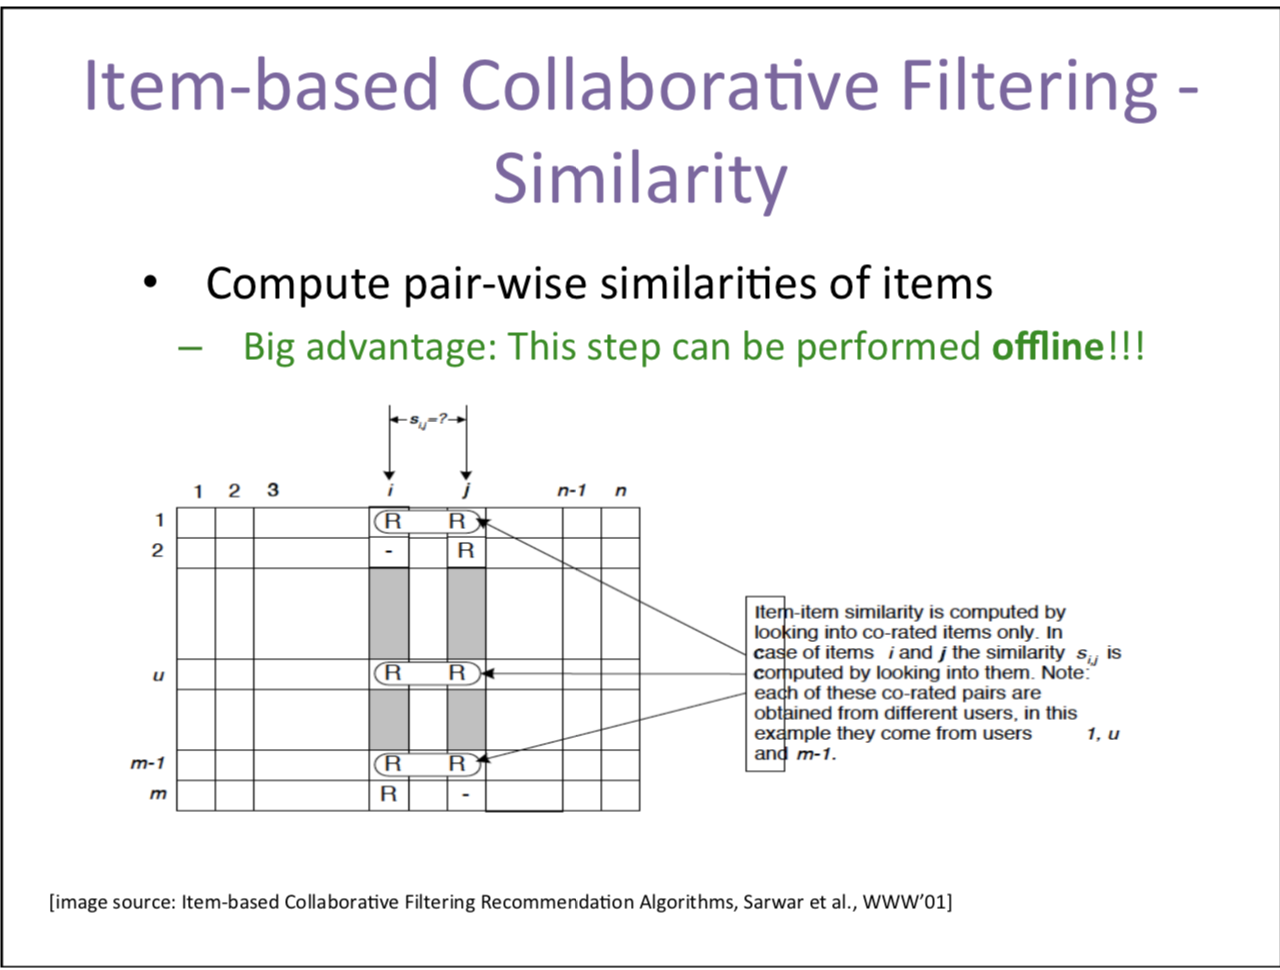

In [4]:
knn.train(trainingSet)

Computing the cosine similarity matrix...
Done computing similarity matrix.


/Users/rash/anaconda3/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [5]:
testSet = trainingSet.build_anti_testset()
predictions = knn.test(testSet)

Now that we have trained our model, we want to make movie recommendations for users. Using the build_anti_testset method, we can find all user-movie pairs in the training set where the user has not viewed the movie and create a “testset” out of these entries.

Since our model will make dozens of movie recommendations for each user, we are going to use a helper method to get only the top three movie recommendations for each user.

In [20]:
from collections import defaultdict
 
def get_top3_recommendations(predictions, topN = 3):
     
    top_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_recs[uid].append((iid, est))
     
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]
     
    return top_recs


In [21]:
import os, io
 
def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and returns a
    mapping to convert raw ids into movie names.
    """
 
    file_name = (os.path.expanduser('~') +
                 '/.surprise_data/ml-100k/ml-100k/u.item')
    rid_to_name = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
 
    return rid_to_name

In [12]:
top3_recommendations = get_top3_recommendations(predictions)

rid_to_name = read_item_names()
i=0;
for uid, user_ratings in top3_recommendations.items():
    print(uid, [rid_to_name[iid] for (iid, _) in user_ratings])
    i=i+1;
    if(i==5):
        break;

196 ['Very Natural Thing, A (1974)', 'Walk in the Sun, A (1945)', 'War at Home, The (1996)']
186 ['Mamma Roma (1962)', 'Conspiracy Theory (1997)', 'Toy Story (1995)']
22 ['Entertaining Angels: The Dorothy Day Story (1996)', 'King of New York (1990)', 'Usual Suspects, The (1995)']
244 ['Other Voices, Other Rooms (1997)', 'Big Bang Theory, The (1994)', 'Godfather, The (1972)']
166 ['Mamma Roma (1962)', 'Delta of Venus (1994)', 'Carmen Miranda: Bananas Is My Business (1994)']


https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

### 2) User Based Collaborative Filtering using surprise scikit library (Using CSV File)

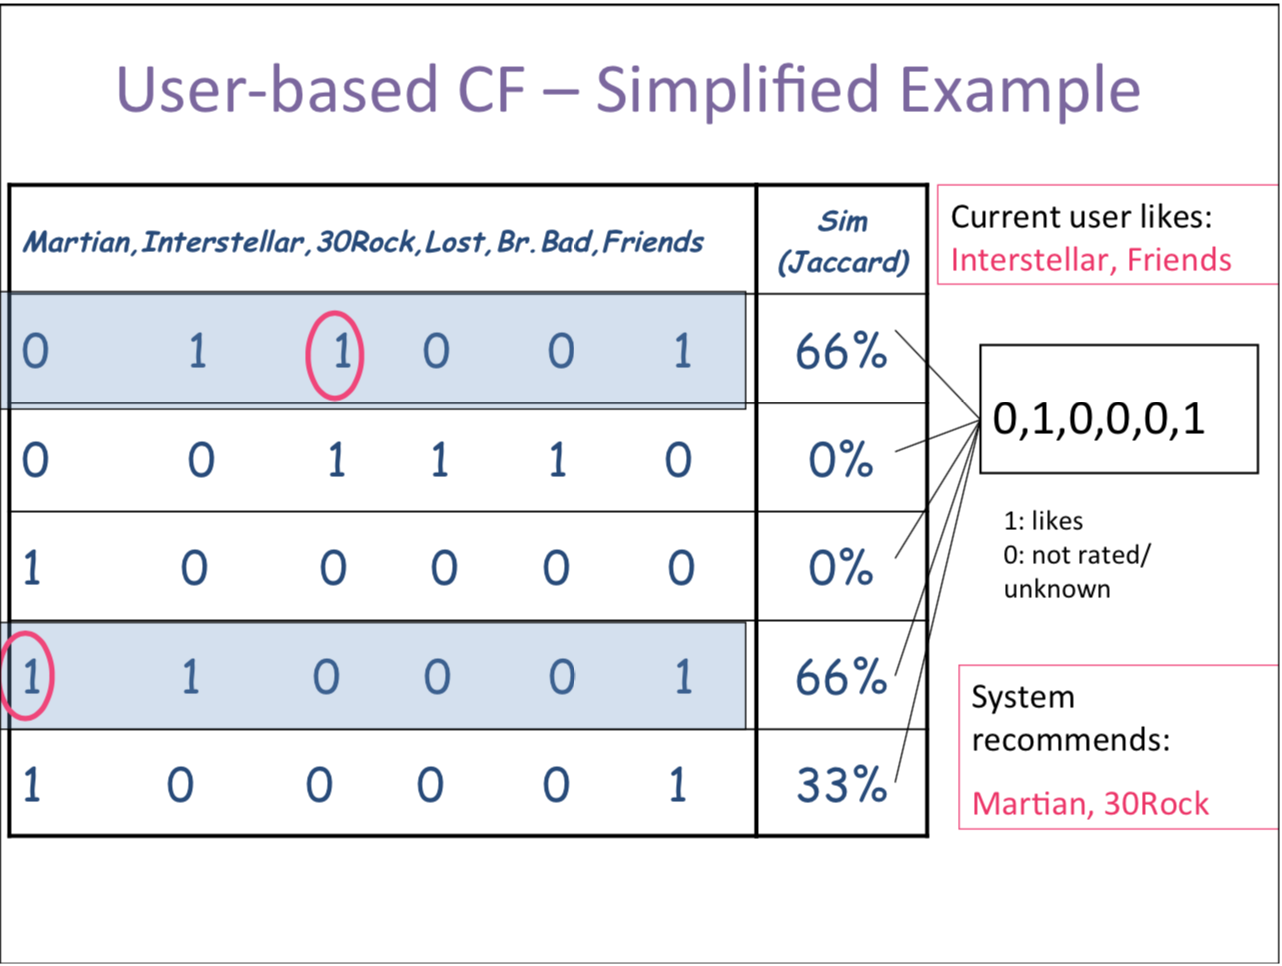

In [13]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# path to dataset file
file_path = os.path.expanduser('ml-100k/u.data')

# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep='\t')

ldata = Dataset.load_from_file(file_path, reader=reader)



In [22]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import KFold

# define a cross-validation iterator
kf = KFold(n_splits=4)
algo = SVD()

sim_options = {
    'name': 'cosine',
    'user_based': True
}
 
knn = KNNBasic(sim_options=sim_options, k=3)

for trainset, testset in kf.split(ldata):
    # train and test algorithm.
    knn.fit(trainset)
    
    predictions = knn.test(testset)
    
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1447
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1497
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1493
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1430


### 3) SVD Matrix Factorization

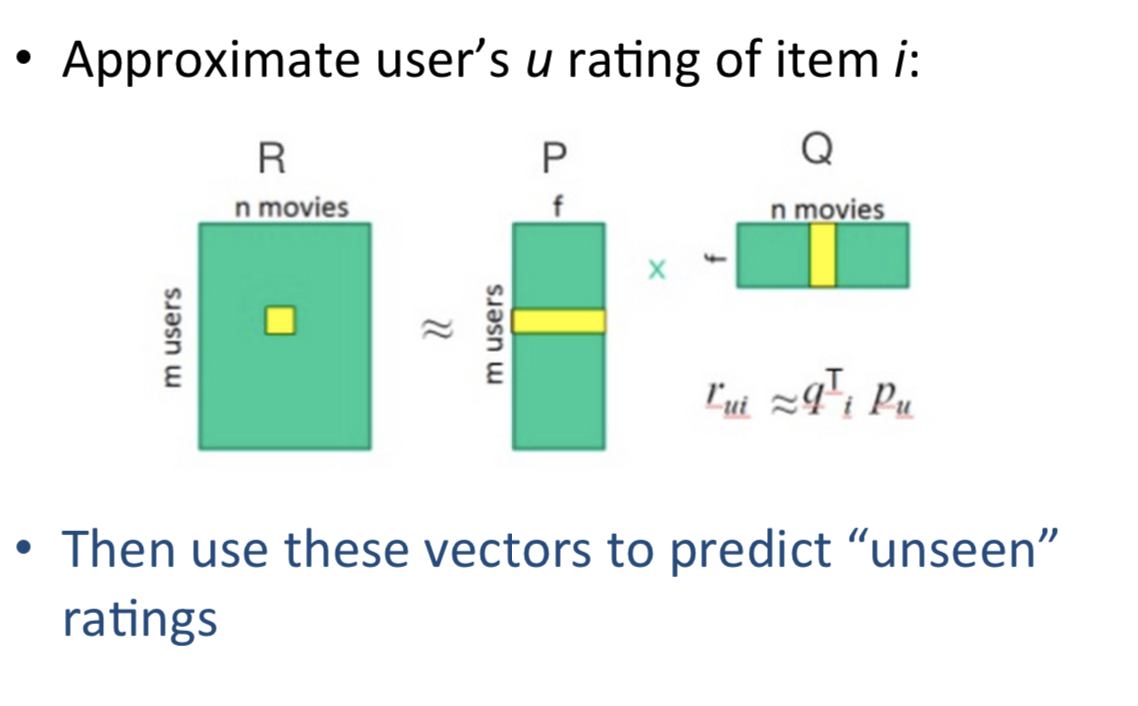

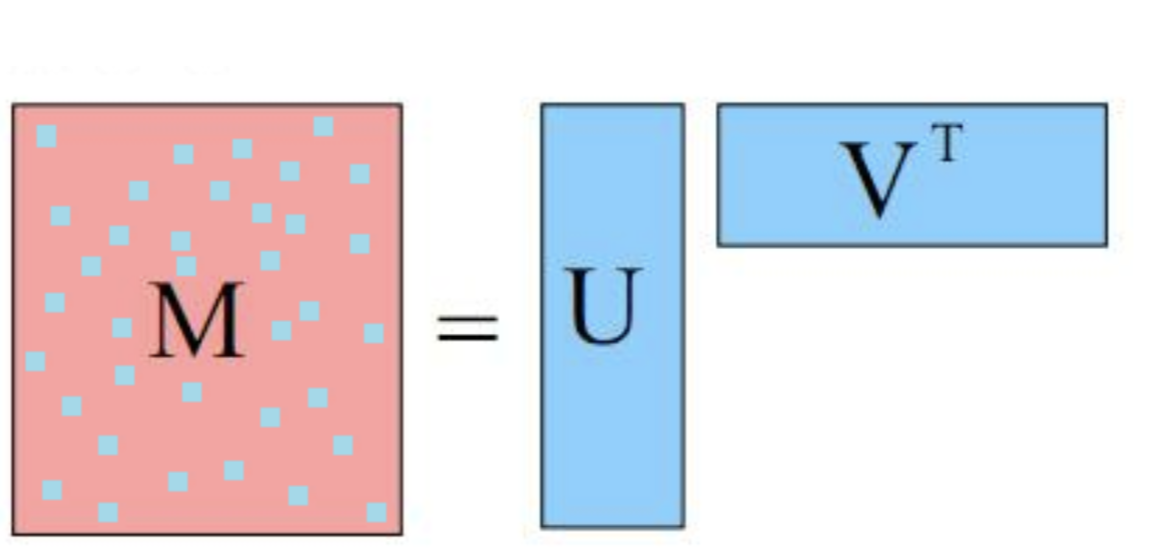

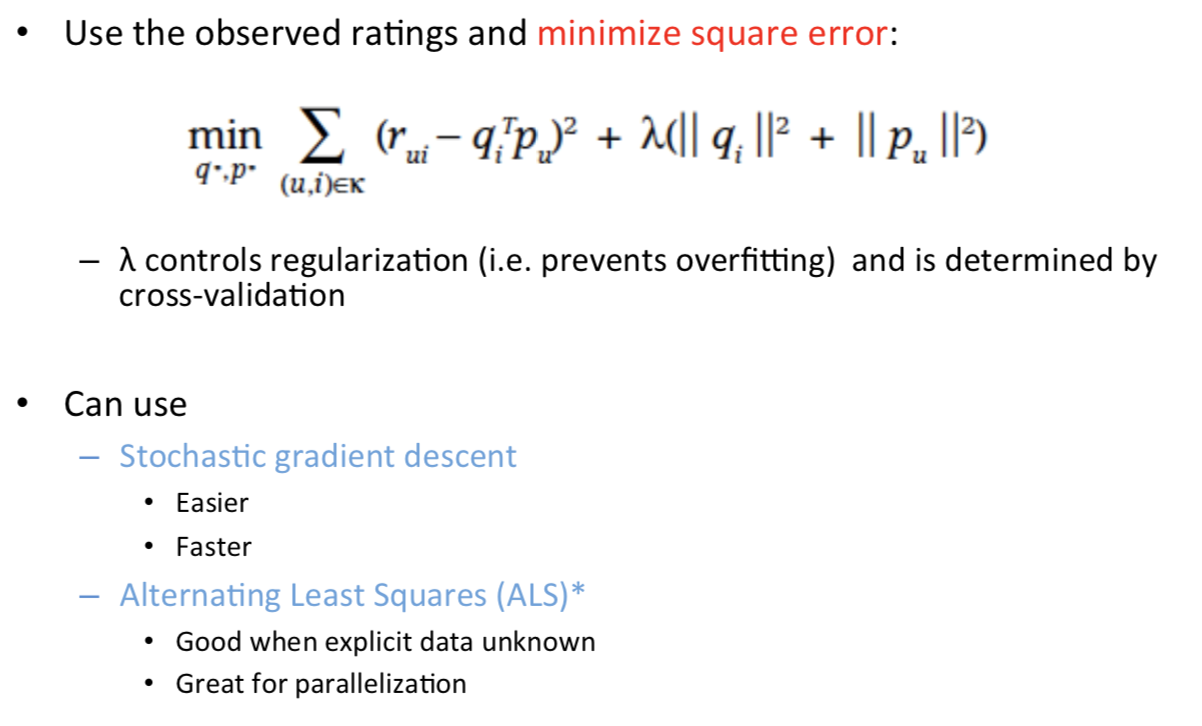

In [ ]:

from surprise.prediction_algorithms.matrix_factorization import SVD

from surprise import accuracy
from surprise.model_selection import KFold

# define a cross-validation iterator
kf = KFold(n_splits=4)
algo = SVD(n_factors=500, n_epochs=5, lr_all=0.1)

for trainset, testset in kf.split(ldata):
    # train and test algorithm.
    algo.fit(trainset)
    
    predictions = algo.test(testset)
    
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9481
RMSE: 0.9484


Refer below tutorial if you are looking for building KNN and similarity model from scratch.
https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/
